# Les 05

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [175]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%config InlineBackend.figure_format='svg'
%matplotlib inline
plt.style.use('bmh')

In [176]:
boston = load_boston()

In [177]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [178]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)

y = pd.DataFrame(data=boston.target, columns=['target'])


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [180]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [181]:
scaler = StandardScaler()

In [182]:
X_train_scaled = scaler.fit_transform(X_train)

In [183]:
X_test_scaled = scaler.transform(X_test)

In [184]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston.feature_names)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston.feature_names)

In [185]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [186]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

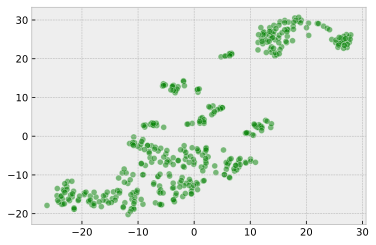

In [187]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c='g', edgecolors='w', alpha=0.5)

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [188]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [189]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [190]:
train_labels = model.fit_predict(X_train)

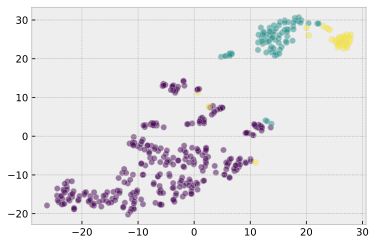

In [191]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels, edgecolors='lightgrey', alpha=0.5)

In [192]:
train_labels_scaled  = model.fit_predict(X_train_scaled)

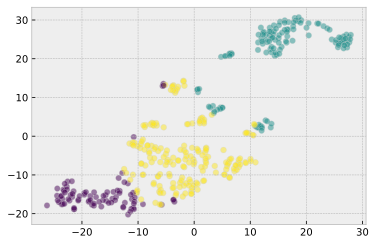

In [193]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels_scaled, edgecolors='lightgrey', alpha=0.5)

In [194]:
X_train_scaled['cluster'] = train_labels
X_train_scaled['price'] = y_train

In [195]:
X_train_scaled.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,cluster,price
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505,1,NaN
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474,0,21.6
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595,0,NaN
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387,2,33.4
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787,0,36.2


In [197]:
X_train_scaled.groupby('cluster').agg({'CRIM':'mean', 'price':'mean'})

,CRIM,price
cluster,,
0,-0.361489,24.436842
1,0.917924,25.075439
2,1.212903,22.072000


### * Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [198]:
test_labels = model.fit_predict(X_test)

In [199]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

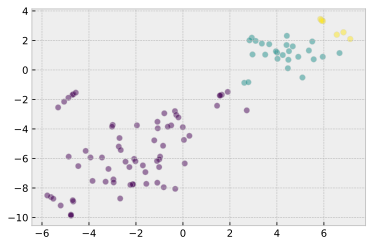

In [200]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels, edgecolors='lightgrey', alpha=0.5)

In [201]:
X_test_scaled['cluster'] = test_labels
X_test_scaled['price'] = y_test

In [202]:
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,cluster,price
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210,0,24.0
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094,0,NaN
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338,1,34.7
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875,0,NaN
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687,1,NaN


In [203]:
X_test_scaled.groupby('cluster').agg({'CRIM':'mean', 'price':'mean'})


,CRIM,price
cluster,,
0,-0.379363,21.805263
1,0.548301,23.925000
2,1.738766,20.900000
